#1. Author

**Student Name:** Benita Ashley

**Student Id:** 220058151

#2. Problem Formulation

You listen to a familiar song in a club or restaurant and you've listened to this song a thousand times long ago and the sentimentality of the song really touches you deeply. You want to desperately hear it but you can't remember the name! This is when song recommendation systems come to your rescue. 

However there exist popular apps like Shazam which gives you the name of the song if you capture 20 seconds of a song be it the intro, verse or chrorus, it will create a fingerprint for the recorded sample, consult the database and use its music recognition algorithm to tell you exactly what song you are listening to. But this works on recording the song while its playing and not later on.

We are trying to build a machine learning model with the dataset of interpretation type hums and whistles of sample length 15 seconds each to detect the song label and returning the correct name for the same.

#3. Machine Learning Pipeline

The pipeline consists of the following activities in the given order:

1. Data Loading and Mounting 
2. Feature Extraction
3. Data Cleaning
4. Data Preprosessing
5. Different Model Training and selection of the best model

The project will progress in the order of the steps as mentioned above and each step will be ellaborated with relevant code and analysis.

# Environment set up

In this section we will set up a Colab environment for the MLEnd mini-project. This is an environment set up for the basic approach of the mini project. First having as a template, the starter kit from the laps I follow the next steps.: 

1.   Go to https://drive.google.com/
2.   Used the already created folder "Data" and "ECS7020P" inside it.

Then I am loading the following libraries and mounting my personal Google Drive storage system.

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

# Import seaborn
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import sklearn

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

drive.mount('/content/drive')

Mounted at /content/drive


# Data download

In this section I will download the Potter and StarWars of the MLEnd Hums and Whistles Dataset. 

First, I will use the function from the started kit to allow me to download a file into a chosen location.

In [ ]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

The next step is to download the audio files into the folder 'MyDrive/Data/ECS7020P'.

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=6P5DHMOKUOST11V4/45V197K56GJCN375FM97GKO"
save_path = '/content/drive/MyDrive/Data/ECS7020P/Panther_1.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=556JF9IP9676AAIB/450D7KAI0S5U15VGE2A7MKO"
save_path = '/content/drive/MyDrive/Data/ECS7020P/Panther_2.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=555I92D6GH5I5L9M/59UH97479B4AQOLUKB0QI08"
save_path = '/content/drive/MyDrive/Data/ECS7020P/Hakuna_1.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=6TF3DEBMAIDN49A6/6L4DRTRS7KUT51CTGADNEN8"
save_path = '/content/drive/MyDrive/Data/ECS7020P/Hakuna_2.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=5942PCQC7ROPGNTS/6PF33CLHC39AEQ41JJS9AC8"
save_path = '/content/drive/MyDrive/Data/ECS7020P/Showman_1.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=6132RDI977V9AMLR/6L7J7ETOF7SPSKDEMB5Q81G"
save_path = '/content/drive/MyDrive/Data/ECS7020P/Showman_2.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=4LV194DEJH9JLV8U/652DJI5BDRM82DIIPKKCFQ0"
save_path = '/content/drive/MyDrive/Data/ECS7020P/Frozen_1.zip'
download_url(url, save_path)

In [ ]:
url  = "https://collect.qmul.ac.uk/down?t=6TDILDI977V9AMLR/6P4TPGT0A70LC6BHTK7VPMG"
save_path = '/content/drive/MyDrive/Data/ECS7020P/Frozen_2.zip'
download_url(url, save_path)

To check whether all the files have been downloaded in the drive

In [ ]:
path = '/content/drive/MyDrive/Data/ECS7020P'
os.listdir(path)

['Basic',
 'Advanced',
 'Frozen_1.zip',
 'Hakuna_1.zip',
 'Hakuna_2.zip',
 'Panther_2.zip',
 'Panther_1.zip',
 'Showman_1.zip',
 'Showman_2.zip',
 'Frozen_2.zip']

# Understanding our dataset sample

Now we will unzip the data set and place it inside folder name 'Advanced'

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/ECS7020P/Advanced/'
zip_path = '/content/drive/MyDrive/Data/ECS7020P/Hakuna_1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/ECS7020P/Advanced/'
zip_path = '/content/drive/MyDrive/Data/ECS7020P/Hakuna_2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/Data/ECS7020P/Advanced/*.wav'
files = glob.glob(sample_path)
len(files)

412

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/ECS7020P/Advanced/'
zip_path = '/content/drive/MyDrive/Data/ECS7020P/Panther_1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/ECS7020P/Advanced/'
zip_path = '/content/drive/MyDrive/Data/ECS7020P/Panther_2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/Data/ECS7020P/Advanced/*.wav'
files = glob.glob(sample_path)
len(files)

825

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/ECS7020P/Advanced/'
zip_path = '/content/drive/MyDrive/Data/ECS7020P/Frozen_1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/ECS7020P/Advanced/'
zip_path = '/content/drive/MyDrive/Data/ECS7020P/Frozen_2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/Data/ECS7020P/Advanced/*.wav'
files = glob.glob(sample_path)
len(files)

1235

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/ECS7020P/Advanced/'
zip_path = '/content/drive/MyDrive/Data/ECS7020P/Showman_1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/ECS7020P/Advanced/'
zip_path = '/content/drive/MyDrive/Data/ECS7020P/Showman_2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/Data/ECS7020P/Advanced/*.wav'
files = glob.glob(sample_path)
len(files)

1645

As you can see, the name of each file follows the naming convention [Participant ID]_[type of recording]_[interpretation number]_[song]. We can parse each file name and extract this information. Let's do it for the first one:

In [ ]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('    The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('    The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data/ECS7020P/Advanced/S133_whistle_1_Panther.wav


The name of the first audio file is:  S133_whistle_1_Panther.wav
    The participand ID is:  S133
    The type of interpretation is:  whistle
    The interpretation number is:  1
    The song is:  Panther.wav


**Data cleaning**

Before we go any further, we should first used regular expression to filter out any file names that don't have the right structure.
This helps improving the accuracy of the classifiers.

In [ ]:
pattern = re.compile(r'(S\d+_hum_[1-4]_Frozen\.wav[^.\s]|S\d+_hum_[1-4]_Panther\.wav[^.\s]|S\d+_hum_[1-4]_Showman\.wav[^.\s]|S\d+_hum_[1-4]_Hakuna\.wav[^.\s]|S\d+_whistle_[12]_Hakuna\.wav[^.\s]|S\d+_whistle_[12]_Showman\.wav[^.\s]|S\d+_whistle_[12]_Panther\.wav[^.\s]|S\d+_whistle_[12]_Frozen\.wav[^.\s])')

In [ ]:
f=str(files)
cleanfiles = pattern.findall(f)

In [ ]:
print(len(cleanfiles))

1316


In [ ]:
print(cleanfiles)

["S133_whistle_1_Panther.wav'", "S133_whistle_2_Panther.wav'", "S135_hum_2_Panther.wav'", "S135_whistle_1_Panther.wav'", "S136_hum_2_Panther.wav'", "S136_hum_4_Panther.wav'", "S137_hum_2_Panther.wav'", "S137_hum_4_Panther.wav'", "S138_hum_2_Panther.wav'", "S138_whistle_1_Panther.wav'", "S140_hum_2_Panther.wav'", "S140_whistle_1_Panther.wav'", "S141_hum_2_Panther.wav'", "S141_whistle_1_Panther.wav'", "S142_hum_1_Panther.wav'", "S142_hum_2_Panther.wav'", "S143_hum_2_Panther.wav'", "S143_whistle_1_Panther.wav'", "S144_hum_2_Panther.wav'", "S144_whistle_1_Panther.wav'", "S147_hum_2_Panther.wav'", "S148_hum_2_Panther.wav'", "S148_whistle_1_Panther.wav'", "S149_hum_2_Panther.wav'", "S149_hum_4_Panther.wav'", "S150_hum_2_Panther.wav'", "S150_whistle_2_Panther.wav'", "S151_hum_2_Panther.wav'", "S151_whistle_1_Panther.wav'", "S152_hum_2_Panther.wav'", "S152_hum_4_Panther.wav'", "S154_hum_2_Panther.wav'", "S154_whistle_1_Panther.wav'", "S155_hum_2_Panther.wav'", "S155_hum_4_Panther.wav'", "S156_

We can create a table-like structure using Python lists that collects the information that we can extract from the names of the audio files:

In [ ]:
MLENDHW_table_adv = [] 

for file in cleanfiles:
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[2]
  song = file.split('/')[-1].split('_')[3].split('.')[0]
  file_name=participant_ID+'_'+interpretation_type+'_'+interpretation_number+'_'+song+'.wav'
  MLENDHW_table_adv.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_table_adv.sort(reverse=False, key=lambda x: x[1])
MLENDHW_df = pd.DataFrame(MLENDHW_table_adv,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S1_hum_2_Frozen.wav,S1,hum,2,Frozen
S1_whistle_2_Frozen.wav,S1,whistle,2,Frozen
S1_hum_1_Showman.wav,S1,hum,1,Showman
S1_whistle_2_Showman.wav,S1,whistle,2,Showman
S1_hum_2_Hakuna.wav,S1,hum,2,Hakuna
...,...,...,...,...
S97_hum_4_Showman.wav,S97,hum,4,Showman
S97_hum_1_Hakuna.wav,S97,hum,1,Hakuna
S97_hum_2_Hakuna.wav,S97,hum,2,Hakuna


#4. Transformation

If we are using a raw audio signal as the input of a machine learning model, we will be operating in a predictor space consisting of hundreds of thousands of dimensions. We can compare this figure with the number of recordings we have.

One approach to deal with this huge dimentionality is to extract a few features from our signals and use these features as predictors instead. In this notebook we will be using the following features:

1.   Power.
2.   Pitch mean.
3.   Pitch standard deviation.
4.   Fraction of voiced region.

# Feature extraction : Pitch

Audio files are complex data types. Specifically they are **discrete signals** or **time series**, consisting of values on a 1D temporal grid. These values are known as *samples* themselves, which might be a bit confusing, as we have used this term to refer to the *items* in our dataset. The **sampling frequency** is the rate at which samples in an audio file are produced. For instance a sampling frequency of 5HZ indicates that 5 produce 5 samples per second, or 1 sample every 0.2 s.


Before doing that we first have to merge our path with the now clean data

In [ ]:
finfiles=[]
for file in MLENDHW_table_adv:
  finfiles.append('/content/drive/MyDrive/Data/ECS7020P/Advanced/'+file[0])
print(finfiles[0])

/content/drive/MyDrive/Data/ECS7020P/Advanced/S1_hum_2_Frozen.wav


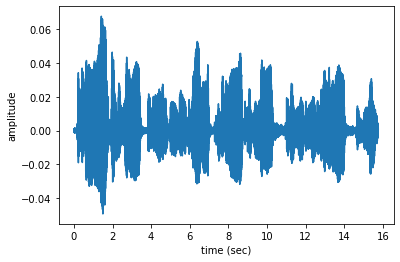

In [ ]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(finfiles[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(finfiles[n]))

In [ ]:
MLENDHW_df.loc[finfiles[n].split('/')[-1]]

participant           S1
interpretation       hum
number                 2
song              Frozen
Name: S1_hum_2_Frozen.wav, dtype: object

In [ ]:
n=0
x, fs = librosa.load(finfiles[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 695341 samples


The getXy function extracts the above mentioned features and returns them as anumpy array and label names in y.

y has the following song labels:
1. Hakuna
2. Panther
3. Frozen
4. Showman

In [ ]:
def getPitch(x,fs,winLen=0.03):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

The problem is to identify every song label in our dataset. The next cell defines a function that takes a number of files and creates a NumPy array containing the 10 audio features used as predictors (`X`) and a label (`y`), that gives a value from 0-3 to each song.

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    if labels_file.loc[fileID]['song']=='Hakuna':
        yi=0
    elif labels_file.loc[fileID]['song']=='Panther':
        yi=1
    elif labels_file.loc[fileID]['song']=='Frozen':
        yi=2
    else:
        yi=3

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)


    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

Now we apply `getXy` to the subsample and obtain the NumPy predictor array (`X`) and a binary label (`y`) for our 48 data.

In [ ]:
X,y = getXy(finfiles, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 1316/1316 [47:14<00:00,  2.15s/it]


The next cell shows the shape of `X` and `y` and prints the labels vector `y`:

In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (1316, 4)
The shape of y is (1316,)
The labels vector is [2 2 3 ... 0 1 1]


#Data Preprocessing

In [ ]:
# If nan sample, remove them
if np.sum(np.isnan(X)):
  idx = np.isnan(X).sum(1)>0
  X = X[~idx]
  y = y[~idx]
print(np.sum(np.isnan(X)))

0


Converting The numpy array to a combined DataFrame to help preprocessing and visualization

In [ ]:
#Concatinatinag X,y

data_all = np.column_stack((X,y))

#numpy array to df

df = pd.DataFrame(data_all,columns=['power','pitch_mean','pitch_std','voiced_fr','y'])

Data Normalisation

We seperate the label and the features and then normalise the feature set

In [ ]:
X = df.copy()
del X['y']
y = df['y'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_normalized = scaler.fit_transform(X)

df_normalized = pd.DataFrame(df_normalized,columns=['power','pitch_mean','pitch_std','voiced_fr'])
df_normalized.head()

,power,pitch_mean,pitch_std,voiced_fr
0,-0.478352,-1.601592,-1.345900,0.885697
1,-0.530632,1.166574,-0.733164,-2.944683
2,-0.723156,-1.688454,-1.400225,-3.088491
3,-0.909862,1.194741,-0.115319,-3.554956
4,-0.387243,-1.436864,-1.337127,-1.054337


When the data was used without standard the accuracy of the models was of the range 0.025-0.35 after the data was preprocessed the accuracy of the models increased to the range of 0.45-0.54

#Data Visualiation

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

1. Here we are plotting the number of files per song from the four songs i.e. Panther, Frozen, Hakuna and Showman. Here we can see that there are 331 audio files for Panther song, 333 audio files for Frozen song, 330 audio files for Hakuna song and 322 audio files for Showman song.
The data used is after discarding the files with incorrect naming convention.
The audio files consist of both Hum and Whistle interpretation types

Number of samples per Song: 

          song
Frozen    333
Panther   331
Hakuna    330
Showman   322


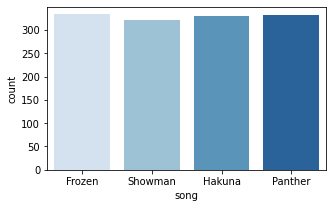

In [ ]:
Song_name = MLENDHW_df["song"].value_counts().to_frame() # Counting the number of samples per song
print("Number of samples per Song: \n\n" , Song_name)

plt.figure(figsize=(5,3))
sns.countplot(x="song", data=MLENDHW_df, palette="Blues")

plt.show()

2. Here we have taken the interpretation type into consideration so as to determine which interpretation type is more suitable to be used in our song recommendation system.
We can see that Hum interpretation type has 939 audio files which is the highest whereas Whistle interpretation type has only 377 audio files which is quite low in comparision. 
From this we can infer that our users prefer humming a song rather than whistling it so while building our recommendation system we can discard the whistle files completely and only rely on hum audio files as thats more preferred.

Number of samples per Interpretation: 

          interpretation
hum                 939
whistle             377


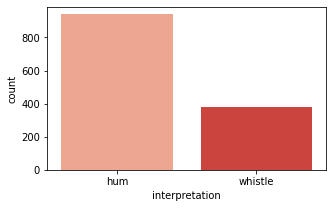

In [ ]:
Interpretation = MLENDHW_df["interpretation"].value_counts().to_frame() # Counting the number of samples per interpretation
print("Number of samples per Interpretation: \n\n" , Interpretation)

plt.figure(figsize=(5,3))
sns.countplot(x="interpretation", data=MLENDHW_df, palette="Reds")

plt.show()

#5. Modelling

For our song recommendation system we are taking the following 4 systems into consideration:

1. **SVM(support-vector machines)**: The idea behind SVMs on which the SVC model is based is to find a separating hyperplane - a subspace with dimension one less than that of the feature space - for points in our feature space. This idea extends to n dimensions. If points are separable by a hyperplane, they are said to be linearly separable. Since there are infinite possible separating hyperplanes for any linearly separable feature space, an SVM computes which points are closest to each such hyperplane and uses them to construct a support vector. The SVM picks the hyperplane which maximizes the distance - margin - to each support vector. In this way, we maximize the separating ability of the chosen hyperplane.

2. **Logistic regression:** Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.)

3. **Naive Bayes classifier:** A naive Bayes classifier is an algorithm that uses Bayes' theorem to classify objects. Naive Bayes classifiers assume strong, or naive, independence between attributes of data points.

4. **Multi-layer Perceptron classifier:** MLP Classifier relies on an underlying Neural Network to perform the task of classification. Here th classification being: Song labels.


#6.Methodology
Four different models are going to be used for the training and validation for our song recommendation system. 65% of the data will be used for training and 35% of it will be used for validation. 
After the training of each model we will extract the training accuracy, validation accuracy and confusion matrix to evaluate our result and choose one model with the highest accuray and performance.
We have also done exploratory analysis on which interpretation type would be preferred by our users from which we find that humming is preferred over whistling however we will not be discarding the whistle audio files for now.

#7. Dataset

The dataset that is going to be used is the MLEnd Hums and Whistles dataset,4 songs accounted for 1645 files. The dataset was then cleaned and the files with wrong labels were discarded. After cleaning the data, the files came down to 1316. We have taken 4 features into consideration for the 4 songs from our datase

Then the song name of each file was used as the label with each subject getting a number from 0-3. That gave as a shape (1316, 4) for the predictors and (1316) for the labels. After that we broke the dataset into training (65%) and validating (35%) dataset with shapes (855, 4), (461, 4) for the predictors and (855,), (461,) for the labels respectively. Finally, the predictors values were normalized as that followed by a greater accuracy.

#8. Results

**Support Vector Machines**

We will use the SVM method provided by scikit-learn and will split (65/35) the dataset defined by X and y into a training set and a validation set.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.35)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((855, 4), (461, 4), (855,), (461,))

Now we fit an SVM model and print both the training accuracty and validation accuracy.

In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.35555555555555557
Validation  Accuracy 0.3405639913232104
The support vectors are (854, 4)


Since validation and training accuracies are close, we believe that our model perform well.

Let's normalize the predictors, to see if the performance improves.

In [ ]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.6970760233918128
Validation  Accuracy 0.43817787418655096
The support vectors are (784, 4)


Both accuracies improved although training accuracy is 70% compared to 40% for the validation accuracy. That drive us to the conclusion that our model overfit. 
Now, using a confusion matrix we will see exactly how our model classify each value.


In [ ]:
from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train))
train_confusion_matrix_normalised = train_confusion_matrix.astype('float') / train_confusion_matrix.sum(axis=1)[:, np.newaxis]

val_confusion_matrix = confusion_matrix(y_true=y_val, y_pred=model.predict(X_val))
val_confusion_matrix_normalised = val_confusion_matrix.astype('float') / val_confusion_matrix.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised))

Training confusion matrix:
 [[166  23   8  24]
 [ 33 143  18  14]
 [ 26  14 158  19]
 [ 44  16  20 129]]

Validation confusion matrix:
 [[55 20 15 19]
 [32 61 20 10]
 [23 15 61 17]
 [41 17 30 25]]

Normalised training confusion matrix:
 [[0.75113122 0.1040724  0.0361991  0.10859729]
 [0.15865385 0.6875     0.08653846 0.06730769]
 [0.11981567 0.06451613 0.7281106  0.0875576 ]
 [0.21052632 0.07655502 0.09569378 0.61722488]]

Normalised validation confusion matrix:
 [[0.50458716 0.18348624 0.13761468 0.17431193]
 [0.2601626  0.49593496 0.16260163 0.08130081]
 [0.19827586 0.12931034 0.52586207 0.14655172]
 [0.36283186 0.15044248 0.26548673 0.22123894]]



**Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression

# Here we fit our logistic regression classfier to the training dataset 
log_reg_classifier = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
log_reg_classifier.fit(X_train, y_train)

print('Training accuracy of the logistic classifier: {}'.format(log_reg_classifier.score(X_train, y_train)))
print('Validation accuracy of the logistic classifier: {}'.format(log_reg_classifier.score(X_val, y_val)))

Training accuracy of the logistic classifier: 0.42923976608187137
Validation accuracy of the logistic classifier: 0.41865509761388287


In [ ]:
from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=log_reg_classifier.predict(X_train))
train_confusion_matrix_normalised = train_confusion_matrix.astype('float') / train_confusion_matrix.sum(axis=1)[:, np.newaxis]

val_confusion_matrix = confusion_matrix(y_true=y_val, y_pred=log_reg_classifier.predict(X_val))
val_confusion_matrix_normalised = val_confusion_matrix.astype('float') / val_confusion_matrix.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised))

Training confusion matrix:
 [[ 97  36  50  38]
 [ 47  94  48  19]
 [ 37  21 131  28]
 [ 71  23  70  45]]

Validation confusion matrix:
 [[48 24 18 19]
 [35 53 24 11]
 [19  4 71 22]
 [30 21 41 21]]

Normalised training confusion matrix:
 [[0.43891403 0.16289593 0.22624434 0.1719457 ]
 [0.22596154 0.45192308 0.23076923 0.09134615]
 [0.17050691 0.09677419 0.60368664 0.12903226]
 [0.33971292 0.11004785 0.33492823 0.215311  ]]

Normalised validation confusion matrix:
 [[0.44036697 0.22018349 0.16513761 0.17431193]
 [0.28455285 0.43089431 0.19512195 0.08943089]
 [0.1637931  0.03448276 0.61206897 0.18965517]
 [0.26548673 0.18584071 0.36283186 0.18584071]]



**Naive Bayes classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_A = GaussianNB()
gnb_A.fit(X_train, y_train)
print('Training accuracy : {}'.format(gnb_A.score(X_train, y_train)))
print('Validation accuracy : {}'.format(gnb_A.score(X_val, y_val)))

Training accuracy : 0.38011695906432746
Validation accuracy : 0.3232104121475054


In [ ]:
train_confusion_matrix_naive_A = confusion_matrix(y_true=y_train, y_pred=gnb_A.predict(X_train))
train_confusion_matrix_normalised_naive_A = train_confusion_matrix_naive_A.astype('float') / train_confusion_matrix_naive_A.sum(axis=1)[:, np.newaxis]

val_confusion_matrix_naive_A = confusion_matrix(y_true=y_val, y_pred=gnb_A.predict(X_val))
val_confusion_matrix_normalised_naive_A = val_confusion_matrix_naive_A.astype('float') / val_confusion_matrix_naive_A.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix_naive_A))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix_naive_A))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised_naive_A))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised_naive_A))

Training confusion matrix:
 [[ 36  34  27 124]
 [ 13  80  32  83]
 [ 17  17  84  99]
 [ 22  23  39 125]]

Validation confusion matrix:
 [[16 18 12 63]
 [16 43 12 52]
 [16  7 31 62]
 [11 20 23 59]]

Normalised training confusion matrix:
 [[0.16289593 0.15384615 0.12217195 0.56108597]
 [0.0625     0.38461538 0.15384615 0.39903846]
 [0.07834101 0.07834101 0.38709677 0.4562212 ]
 [0.10526316 0.11004785 0.18660287 0.59808612]]

Normalised validation confusion matrix:
 [[0.14678899 0.16513761 0.11009174 0.57798165]
 [0.1300813  0.3495935  0.09756098 0.42276423]
 [0.13793103 0.06034483 0.26724138 0.53448276]
 [0.09734513 0.17699115 0.20353982 0.52212389]]



**Deep Learning Model**

Keeras is been used to develop a deep connected Multilayer perceptron. It has 6 densely connected layers and 3 dropout layers. The activation function used is Leakly Rectified Linear Unit. 

The hyper parameters batch size and epoch was updated based on repeated training. Batch size 16, 32, 64, 128 were used with epoch 250, 100, 70, 50 were used. 

Best results obtained were with batch size =16 and epoch = 250

The training accuracy is 0.52 and validation accuracy is 0.49



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential

from keras.layers import Activation, Dense, Dropout
from keras.constraints import max_norm
model = Sequential()

model.add(Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2), input_shape= (X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.2),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='softmax'))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               1280      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)               

In [ ]:
e = 250
history = model.fit(   X_train,
    y_train,
    batch_size=16,
    epochs=e,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),)

Epoch 1/250
54/54 [==============================] - 1s 7ms/step - loss: 2.4449 - accuracy: 0.2257 - val_loss: 1.4281 - val_accuracy: 0.3341
Epoch 2/250
54/54 [==============================] - 0s 3ms/step - loss: 1.6083 - accuracy: 0.2865 - val_loss: 1.3528 - val_accuracy: 0.4013
Epoch 3/250
54/54 [==============================] - 0s 4ms/step - loss: 1.4629 - accuracy: 0.3298 - val_loss: 1.2840 - val_accuracy: 0.4121
Epoch 4/250
54/54 [==============================] - 0s 4ms/step - loss: 1.4027 - accuracy: 0.3778 - val_loss: 1.2733 - val_accuracy: 0.4338
Epoch 5/250
54/54 [==============================] - 0s 4ms/step - loss: 1.4100 - accuracy: 0.3836 - val_loss: 1.2719 - val_accuracy: 0.4295
Epoch 6/250
54/54 [==============================] - 0s 4ms/step - loss: 1.3806 - accuracy: 0.3743 - val_loss: 1.2744 - val_accuracy: 0.4187
Epoch 7/250
54/54 [==============================] - 0s 4ms/step - loss: 1.3438 - accuracy: 0.4000 - val_loss: 1.2547 - val_accuracy: 0.4425
Epoch 8/250
5

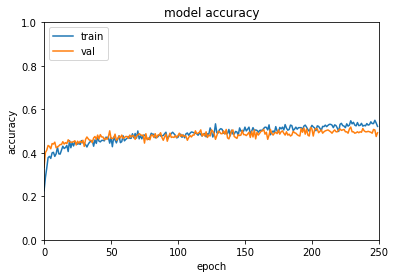

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.axis([0,e,0,1])
plt.show()

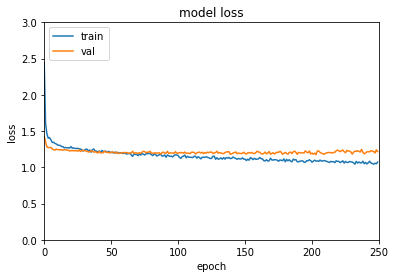

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.axis([0,e,0,3])
plt.show()

In [ ]:
model.evaluate(X_val, y_val)

15/15 [==============================] - 0s 2ms/step - loss: 1.8556 - accuracy: 0.4469


[1.8556243181228638, 0.4468546509742737]

#9. Conclusion

Out of the three models SVM, Logistic Regression and Naive Bayes Classifier, the best performance is that of Logistic Regression model.
We've also noticed that the accuracy was low at first but then after normalisation the accuracies increase.

We also trained an MLP by tuning the hyper parameters. Here we have selected one which gave us good training and validation accuracy.

We can look into Neural networks to get better accuracy for our song recommendation system. We can also collect demographic data regarding the area of living of the users along with their preferance of interpretation type i.e either hum or whistle for classification. 

We can build a model which takes an audio file with hum or whistle interpretation type and then return the song label. 
